<a href="https://colab.research.google.com/github/ChangED1122/Python/blob/Python-PyTorch/PyTorch_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor #轉換成tensor格式
import  matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader #把資料分成一小堆
from torch import nn
import torch

In [ ]:
train_data = datasets.FashionMNIST(
                      root="image",
                      train=True,
                      download=True,
                      transform=ToTensor()) #轉換成tensor格式，並預先幫我們做特徵縮放

test_data = datasets.FashionMNIST(
                      root="image",
                      train=False,
                      download=True,
                      transform=ToTensor())

In [ ]:
img, label = train_data[0]
class_names = train_data.classes
label , train_data.classes

(9,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

plt 在畫圖時，顏色要放最後一個維度，利用permute()調整 ，
新的第0個維度設定成舊的第幾個維度 ,新的第1個維度設定成舊的第幾個維度 ,新的第2個維度設定成舊的第幾個維度

Text(0.5, 1.0, 'T-shirt/top')

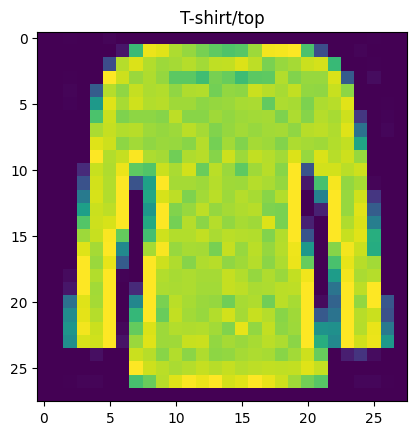

In [ ]:
random_idx = random.randint(0,len(train_data)-1)
img, label = train_data[random_idx]
plt.imshow(img.permute(1, 2, 0)) # 調整維度
plt.title(class_names[label])

In [ ]:
len(train_data), len(test_data) # 資料量太大做剃度下降不能全部看完再更新，速度太慢

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True) #一開始的資料是有順序的排列直接操作訓練效果不好

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

len(train_dataloader) , len(test_dataloader)  # 60000 / 32 , 10000 / 32

(1875, 313)

In [ ]:
qq = [1,2,3]  # 迭代範例
qq_iter = iter(qq)
next(qq_iter)

1

In [ ]:
next(qq_iter)

2

In [ ]:
next(qq_iter)

3

train_dataloader 是一個可迭代的物件 好幾個batch 結果為第一小堆的feature與label

In [ ]:
x_first_batch, y_first_batch = next(iter(train_dataloader))  
x_first_batch.shape , y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Shirt')

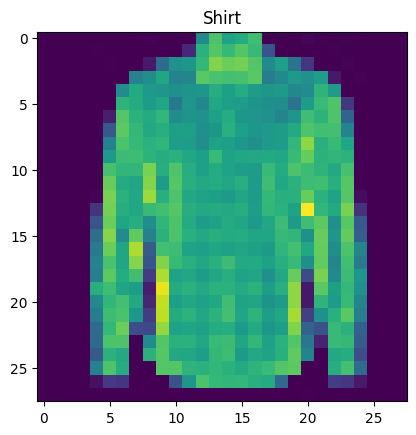

In [ ]:
random_idx = random.randint(0,len(x_first_batch)-1)
img, label = x_first_batch[random_idx], y_first_batch[random_idx]

plt.imshow(img.permute(1, 2, 0)) # 調整維度
plt.title(class_names[label])

在輸入到神經網路前須先將特徵攤平或拉直 3維 -> 1維

In [ ]:
x_first_batch[0].shape

torch.Size([1, 28, 28])

In [ ]:
f = nn.Flatten(start_dim=0, end_dim=-1) # 第零個維度開始攤平
f(x_first_batch[0]).shape

torch.Size([784])

定義模型

In [ ]:
class ImageClassificationModel(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1), # torch.Size([32, 1, 28, 28] 第0個維度是batch size所以從第1維開始攤平
      nn.Linear(in_features= input_shape , out_features= output_shape ), 
      #nn.Softmax(dim=1)    #torch.Size([32, 10]) 第1維開始softmax
    )
    

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
x_first_batch, y_first_batch = next(iter(train_dataloader))  
x_first_batch.shape , y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

s = nn.Softmax(dim=0) #因tensor（y_pred）只有一維，dim=0

s(y_pred).argmax() # 找最大機率在第幾位

s(y_pred).argmin()

In [ ]:
torch.manual_seed(87)
model = ImageClassificationModel(28*28 , 10) # input:28*28 output:10個類別
y_pred = model(x_first_batch)
y_pred.shape , y_pred , y_pred.argmax(dim=1) #torch.Size([32, 10] 的第一維度

(torch.Size([32, 10]),
 tensor([[-4.0651e-01, -2.6150e-01,  2.2308e-01,  1.9855e-01,  3.2721e-01,
           1.2734e-01, -3.4229e-01,  3.1314e-03, -2.5192e-01, -5.9939e-01],
         [-3.0022e-01, -1.7727e-01,  3.8762e-01, -5.2285e-02,  3.4991e-01,
           3.4918e-02, -4.4279e-01, -1.5478e-01, -1.0591e-01, -4.5101e-01],
         [-4.0505e-01,  6.0398e-02,  6.0689e-03,  1.2348e-01,  3.1892e-01,
           3.3127e-01, -4.1749e-01,  4.5747e-01, -1.7755e-02, -8.3783e-01],
         [-9.9110e-02, -8.7089e-02,  1.1832e-01,  4.9723e-02,  1.5357e-01,
           1.8072e-01, -3.3465e-01,  1.8870e-01, -1.1503e-01, -6.9558e-01],
         [-1.8995e-01, -2.8995e-01,  2.6140e-01,  8.5433e-02,  3.1208e-02,
           3.9143e-01, -4.0534e-01,  5.0715e-01, -3.4166e-01, -5.7870e-01],
         [-3.4175e-01, -2.2622e-01,  3.3166e-01,  4.3246e-01,  5.6852e-03,
           6.6374e-02, -5.0946e-01,  5.0591e-02,  1.2762e-01, -6.8074e-01],
         [-2.7003e-01, -1.2058e-01,  2.5829e-01,  3.5165e-01,  3.4949e-

softmax函數 加起來機率為1 

CrossEntropyLoss( ) 會先幫我們做softmax，故把一開始模型設定的softmax刪除

In [ ]:
cost_fn = nn.CrossEntropyLoss() 
y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)

print(cost)
print(model.state_dict())

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

tensor(2.4140, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[-0.0355,  0.0281, -0.0032,  ..., -0.0253,  0.0329, -0.0172],
        [-0.0108, -0.0178,  0.0132,  ...,  0.0324, -0.0354,  0.0180],
        [-0.0197,  0.0092,  0.0163,  ..., -0.0204,  0.0296, -0.0310],
        ...,
        [ 0.0022,  0.0250, -0.0206,  ...,  0.0313,  0.0052, -0.0215],
        [ 0.0283,  0.0323,  0.0323,  ...,  0.0146, -0.0040,  0.0086],
        [ 0.0243,  0.0077, -0.0030,  ...,  0.0065,  0.0205,  0.0202]])), ('layer_stack.1.bias', tensor([ 0.0099,  0.0330,  0.0156, -0.0259,  0.0210, -0.0344, -0.0287,  0.0027,
        -0.0189,  0.0245]))])
tensor(2.3201, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[-0.0355,  0.0281, -0.0032,  ..., -0.0253,  0.0328, -0.0172],
        [-0.0108, -0.0178,  0.0132,  ...,  0.0323, -0.0354,  0.0180],
        [-0.0197,  0.0092,  0.0163,  ..., -0.0205,  0.0296, -0.0310],
        ...,
        [ 0.0022,  0.0250, -0.0206,  ...,  0.0

In [ ]:
def accuracy_fn(y_pred, y_true):
  correct_num = ( y_pred==y_true).sum()
  acc = correct_num/len(y_true) *100
  return acc

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

ImageClassificationModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [ ]:
def train_step(dataloader, model, cost_fn, optimizer, accuracy_fn, device): #訓練步驟
   train_cost = 0
   train_acc = 0

   for batch, (x, y) in enumerate(dataloader):  # enumerate( ) 知道第幾個batch
    x= x.to(device)
    y= y.to(device)
    model.train()

    y_pred = model(x)

    cost = cost_fn(y_pred, y)
    train_cost += cost   #  train_cost的值=每個batch的cost加總

    train_acc += accuracy_fn(y_pred.argmax(dim=1) ,y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
  
   train_cost /= len(train_dataloader)  #取平均
   train_acc /= len(train_dataloader)
   print(f"\nTrain Cost: {train_cost:.4f}, Train Acc: {train_acc:.2f}")

def test_step(dataloader, model, cost_fn, accuracy_fn, device): #測試步驟
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x= x.to(device)
      y= y.to(device)
      test_pred = model(x)
      
      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1) ,y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  
  print(f"Test  Cost: {test_cost:.4f}, Test  Acc: {test_acc:.2f}  \n")

In [ ]:
from tqdm.auto import tqdm  #進度條

epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(train_dataloader, model, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model, cost_fn, accuracy_fn, device)

  

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
------

Train Cost: 0.8185, Train Acc: 74.45
Test  Cost: 0.6519, Test  Acc: 78.01  

Epoch: 1
------

Train Cost: 0.5891, Train Acc: 80.89
Test  Cost: 0.5801, Test  Acc: 80.85  

Epoch: 2
------

Train Cost: 0.5400, Train Acc: 82.38
Test  Cost: 0.5481, Test  Acc: 81.50  

Epoch: 3
------

Train Cost: 0.5138, Train Acc: 83.00
Test  Cost: 0.5290, Test  Acc: 82.09  

Epoch: 4
------

Train Cost: 0.4966, Train Acc: 83.39
Test  Cost: 0.5172, Test  Acc: 82.48  

Epoch: 5
------

Train Cost: 0.4839, Train Acc: 83.73
Test  Cost: 0.5091, Test  Acc: 82.55  

Epoch: 6
------

Train Cost: 0.4740, Train Acc: 84.01
Test  Cost: 0.5000, Test  Acc: 82.89  

Epoch: 7
------

Train Cost: 0.4667, Train Acc: 84.32
Test  Cost: 0.4935, Test  Acc: 82.98  

Epoch: 8
------

Train Cost: 0.4603, Train Acc: 84.42
Test  Cost: 0.4900, Test  Acc: 83.04  

Epoch: 9
------

Train Cost: 0.4549, Train Acc: 84.64
Test  Cost: 0.4838, Test  Acc: 83.31  



Softmax -> 多元分類    
    
Sigmoid -> 二元分類

Relu -> 預測價格(>=0)零以下的值都會被轉換成0 ，常用且計算快 

In [ ]:
class ImageClassificationModel2(nn.Module):           #實作新架構
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1), # torch.Size([32, 1, 28, 28] 第0個維度是batch size所以從第1維開始攤平
      nn.Linear(in_features= input_shape , out_features= 5 ),
      nn.ReLU(),
      nn.Linear(in_features= 5 , out_features= 8 ), 
      nn.ReLU(),
      nn.Linear(in_features= 8, out_features= output_shape ) #  不用加softmax，因為 CrossEntropy已經幫我們做
    )
    

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
model_2 = ImageClassificationModel2(28*28, 10)
model_2.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(train_dataloader, model_2, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model_2, cost_fn, accuracy_fn, device)

  

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
------

Train Cost: 1.5730, Train Acc: 41.95
Test  Cost: 0.8514, Test  Acc: 64.86  

Epoch: 1
------

Train Cost: 0.7210, Train Acc: 73.08
Test  Cost: 0.6569, Test  Acc: 76.76  

Epoch: 2
------

Train Cost: 0.6000, Train Acc: 78.93
Test  Cost: 0.5971, Test  Acc: 78.39  

Epoch: 3
------

Train Cost: 0.5554, Train Acc: 80.64
Test  Cost: 0.5753, Test  Acc: 80.03  

Epoch: 4
------

Train Cost: 0.5306, Train Acc: 81.69
Test  Cost: 0.5627, Test  Acc: 80.42  

Epoch: 5
------

Train Cost: 0.5168, Train Acc: 82.15
Test  Cost: 0.5629, Test  Acc: 80.46  

Epoch: 6
------

Train Cost: 0.5062, Train Acc: 82.41
Test  Cost: 0.5232, Test  Acc: 81.74  

Epoch: 7
------

Train Cost: 0.4970, Train Acc: 82.82
Test  Cost: 0.5377, Test  Acc: 80.72  

Epoch: 8
------

Train Cost: 0.4901, Train Acc: 83.01
Test  Cost: 0.5230, Test  Acc: 81.88  

Epoch: 9
------

Train Cost: 0.4853, Train Acc: 83.07
Test  Cost: 0.5138, Test  Acc: 82.26  



In [ ]:
def eval_model( dataloader, model, cost_fn, accuracy_fn, device):
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x= x.to(device)
      y= y.to(device)
      test_pred = model(x)
      
      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1) ,y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  return {
      "model_name": model.__class__.__name__, #取得模型名稱
      "model_cost": test_cost.item(), #.item() 單純取得裡面數字 不會有tensor格式
      "model_acc": test_acc.item()
  }

a = torch.tensor(3) # 只能是一個數字 ，[1,2,3]不行


a.item()

In [ ]:
model_1_result = eval_model( test_dataloader, model, cost_fn, accuracy_fn, device)
model_1_result

{'model_name': 'ImageClassificationModel',
 'model_cost': 0.4837781488895416,
 'model_acc': 83.30670928955078}

In [ ]:
model_2_result = eval_model( test_dataloader, model_2, cost_fn, accuracy_fn, device)
model_2_result

{'model_name': 'ImageClassificationModel2',
 'model_cost': 0.5137758255004883,
 'model_acc': 82.25838470458984}

Underfitting（欠擬合） : 模型不夠擬合資料

解決方法 -> 1.增加學習率 2.訓練久一點 3.增加模型複雜度

Overfitting（過擬合） : 在訓練集表現很好，但是在測試集表現很差


解決方法 -> 1.搜集更多資料 2.簡化模型 3.提早停止訓練


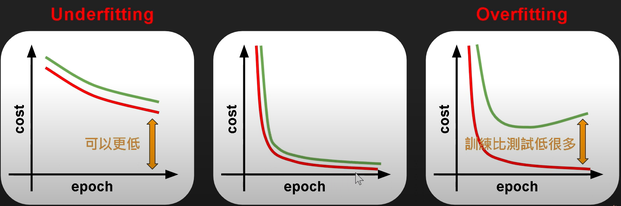